# CNN (Convolutional Neural Network) avec *tf.keras*

Dans ce notebook, nous allons créer des réseaux de neurones pour classifier les images du jeu de données [CIFAR10 small image classification](https://keras.io/datasets/)

**Objectifs**
- Dans un premier temps, nous chargerons les données et nous les préparerons.
- Puis nous implémenterons un réseau fully connected
- Enfin, nous comparerons avec une implémentation CNN
- Et pour finir, nous optimiserons le CNN.

#◢ Import & Vérification des versions des librairies

In [1]:
%matplotlib inline
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import tensorflow as tf
from tensorflow import keras  # tf.keras
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
print("python", sys.version)
for module in tf, keras, pd, np, mpl:
    print(module.__name__, module.__version__)

python 3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
tensorflow 2.9.2
keras.api._v2.keras 2.9.0
pandas 1.3.5
numpy 1.21.6
matplotlib 3.2.2


In [4]:
assert sys.version_info >= (3, 5) # Python ≥3.5 required
assert tf.__version__ >= "2.0"    # TensorFlow ≥2.0 required

#◢ Chargement du jeu de données CIFAR10 small image classification

Keras permet de charger de nombreux datasets avec `keras.datasets`.
Nous utiliserons le jeu de données CIFAR10 small image classification, qui est une base de données de 60000 images regroupant 10 catégories d'images ("avion","voiture", "oiseau","chat","cerf","chien","grenouille","cheval","bateau","camion").

Elle regroupe 50000 images d'apprentissage et 10000 images de test
Ces images sont en couleur et de 32 pixels de côté.

In [5]:
classes = [
    "avion",
    "voiture", 
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion"
]

Chargez le jeu de données en utilisant `keras.datasets.cifar10.load_data()`
Séparez le en :
- un jeu d'entrainement de 45000 images
- un jeu de validation de 5000 images
- un jeu de test de 10000 images

In [6]:
cifar10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

170498071/170498071 [==============================] - 3s 0us/step


#◢ Pré-Processing
Réduisez les valeurs des pixels entre 0 et 1.

In [7]:
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255


Affichez quelques images en utilisant la fonction de la librairie matplot `plt.imshow()` et affichez la classe. 

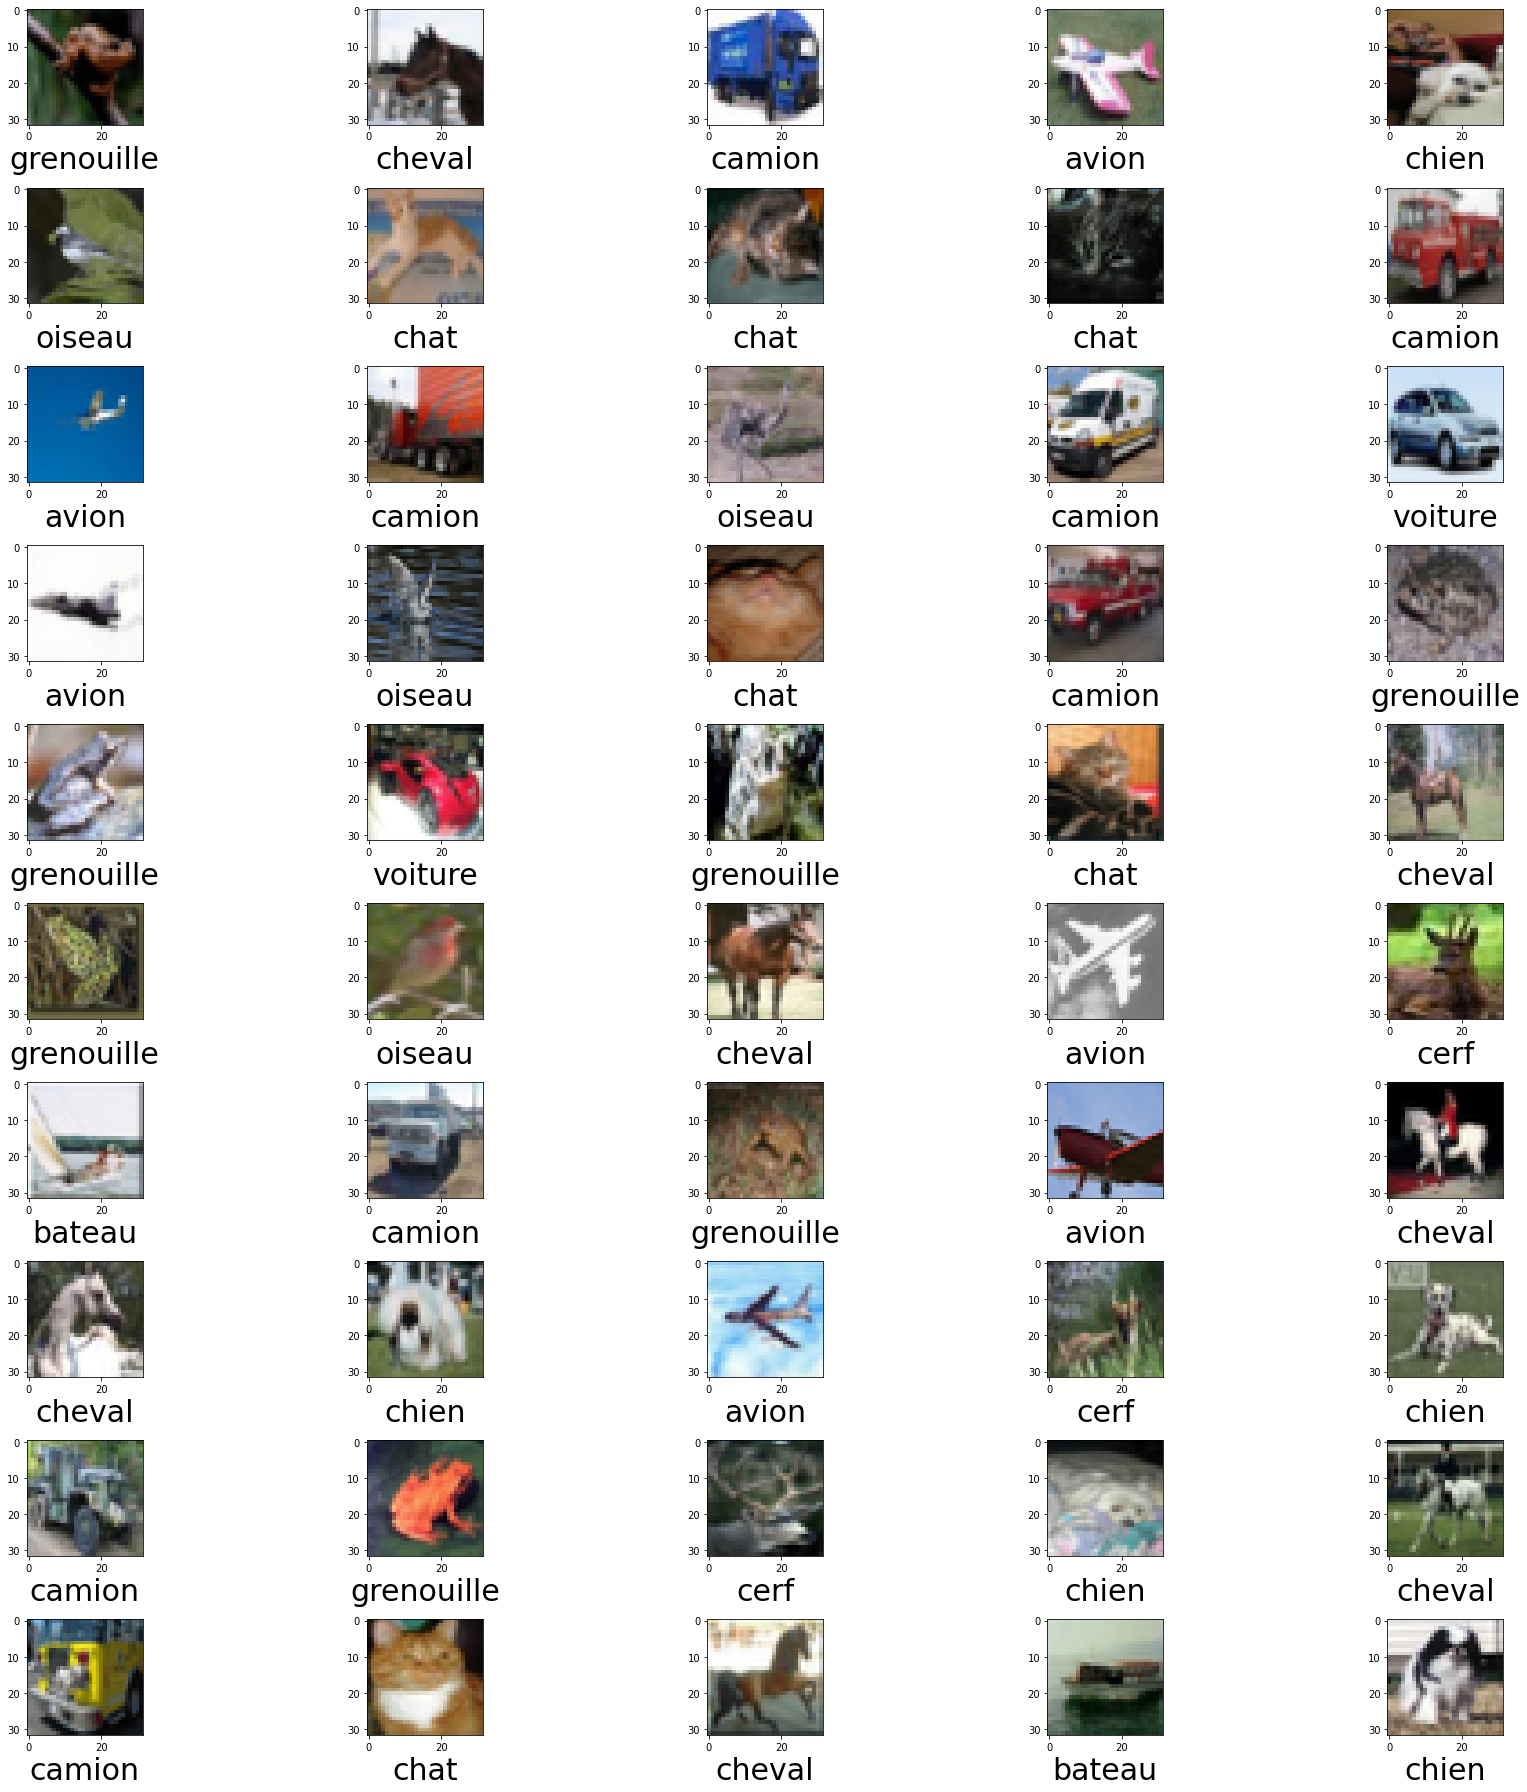

In [8]:
plt.figure(figsize=(25, 25))
n_rows, n_cols = 10, 5
for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(X_train[i])
        plt.xlabel(classes[y_train[i][0]], fontsize=30)
plt.tight_layout()
plt.show()

#◢ Construction d'un modèle Fully Connected

Construction d'un modèle avec l'API `keras.models.Sequential`, sans aucun argument, et avec 5 couches:
  * Une couche `Flatten` (`keras.layers.Flatten`) pour convertir chaque image de taille 32x32x3 image en un simple tableau de 3072 pixels. Comme cette couche est la première de votre modèle, vous devez spécifier l'argument `input_shape`.
  * Trois couche `Dense` (`keras.layers.Dense`) avec 64 neurones (également appelés units), et la fonction d'activation `"relu"`.
  * Pour finir une couche `Dense` avec 10 neurones (1 par classe), et avec la fonction d'activation `"softmax"` pour s'assurer que la somme de toutes les probabilités des classes estimées pour chaque image est égale à 1.

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Compilez le modèle en utilisant :
- la fonction loss `sparse_categorical_crossentropy`
- l'optimizer `keras.optimizers.SGD` avec un `learning rate` à 0.01
- la métrique `accuracy`

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Entrainez le modèle avec 20 epochs.

> Bloc en retrait


Utilisez les données de validation

In [11]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 6s 3ms/step - loss: 1.9759 - accuracy: 0.2768 - val_loss: 1.9983 - val_accuracy: 0.2646
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7687 - accuracy: 0.3645 - val_loss: 1.6958 - val_accuracy: 0.3868
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6849 - accuracy: 0.3962 - val_loss: 1.7139 - val_accuracy: 0.3678
Epoch 4/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6326 - accuracy: 0.4189 - val_loss: 1.7660 - val_accuracy: 0.3500
Epoch 5/20
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5914 - accuracy: 0.4330 - val_loss: 1.7006 - val_accuracy: 0.3892
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5565 - accuracy: 0.4434 - val_loss: 1.5656 - val_accuracy: 0.4370
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5250 - accuracy: 0.4571 - val_loss: 1.5561 - val_accuracy:

Affichez le graphe d'apprentissage du modèle

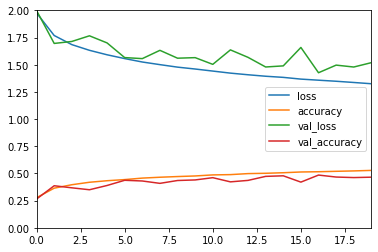

In [12]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 2])
plt.show()

Appelez la méthode `summary()` sur le modèle

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 205,642
Trainable params: 205,642
Non-trainable params: 0
_________________________________________________________________


#◢ Construction d'un modèle CNN

Construction d'un modèle CNN avec l'API `keras.models.Sequential`:
- **la phase de feature learning** : conv2D(filters=32) >> conv2D(filters=32) >> MaxPool2D (pool_size=2) >> conv2D(filters=64) >> conv2D(filters=64) >> MaxPool2D(pool_size=2) <br>
Pour chaque couche `conv2D`, la `taille du kernel` est de `3`, le `padding` est à `same` et la `fonction d'activation` est `relu`
- **la phase de classification**  : flatten >> dense (128 units + relu) >> Dense (10 units + softmax)

In [15]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
1407/1407 [==============================] - 13s 5ms/step - loss: 1.9825 - accuracy: 0.2838 - val_loss: 1.8044 - val_accuracy: 0.3450
Epoch 2/20
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5784 - accuracy: 0.4373 - val_loss: 1.6124 - val_accuracy: 0.4216
Epoch 3/20
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3801 - accuracy: 0.5063 - val_loss: 1.4810 - val_accuracy: 0.4764
Epoch 4/20
1407/1407 [==============================] - 6s 5ms/step - loss: 1.2572 - accuracy: 0.5535 - val_loss: 1.2587 - val_accuracy: 0.5464
Epoch 5/20
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1520 - accuracy: 0.5925 - val_loss: 1.2514 - val_accuracy: 0.5570
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0619 - accuracy: 0.6242 - val_loss: 1.2259 - val_accuracy: 0.5784
Epoch 7/20
1407/1407 [==============================] - 6s 5ms/step - loss: 0.9780 - accuracy: 0.6572 - val_loss: 1.1966 - val_accuracy

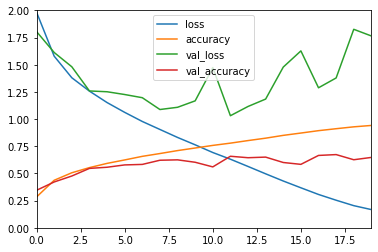

In [16]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 2])
plt.show()

## Que remarquez-vous lors de l'entrainement du modèle ?

Appelez la méthode `summary()` sur le modèle

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

Comparez le nombre de paramètres entre le réseau fully connected et le CNN

#◢  Prédiction
Appelez la méthode `predict()` sur le modèle afin d'estimer la probabilité de chaque classe pour chaque instance (pour une meilleure lisibilité, utilisez la méthode `round()` sur les probabilités générées):

In [18]:
y_proba = model.predict(X_test)
y_proba[:10].round(3)

313/313 [==============================] - 1s 2ms/step


array([[0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.007, 0.068, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.925,
        0.   ],
       [0.001, 0.007, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.988,
        0.003],
       [0.995, 0.   , 0.002, 0.002, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.005, 0.392, 0.   , 0.603, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.801, 0.   , 0.003, 0.195, 0.   , 0.   ,
        0.   ],
       [0.   , 0.947, 0.   , 0.042, 0.   , 0.001, 0.   , 0.   , 0.   ,
        0.01 ],
       [0.   , 0.   , 0.009, 0.127, 0.002, 0.   , 0.862, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.935, 0.062, 0.001, 0.   , 0.001, 0.   ,
        0.   ],
       [0.   , 0.805, 0.   , 0.001, 0.   , 0.   , 0.022, 0.   , 0.002,
        0.17 ]], dtype=float32)

A partir des probabilités des différentes valeurs, déduisons-en la valeur prédite (celle qui a le % maximum => utilisez la fonction `argmax`)

In [19]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([3, 8, 8, ..., 5, 4, 7])

#◢ Visualisation des prédictions 

Méthodes utilitaires pour afficher une image et un bar chart représentant la probabilité des prédictions pour chaque chiffre de 0 à 9 (les prédictions en bleu sont les prédictions correctes et en rouge celles incorrectes)

In [20]:
def plot_prediction_image(predictions_array, true_label, img):

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Objet prédit {} {:2.0f}% ({})".format(classes[predicted_label],
                                                        np.max(predictions_array) *100,
                                                        classes[true_label[0]]),
                                                        color=color)
    
def plot_prediction_bar_chart(predictions_array, true_label, img):
    thisplot = plt.bar(classes, predictions_array, color="#777777")
    plt.ylim([0, 1])
    plt.grid(False)
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')
    plt.xticks(classes, rotation=90)

Affichage de l'image à prédire et de la probabilité des prédictions pour chaque chiffre de 0 à 9 pour la première image

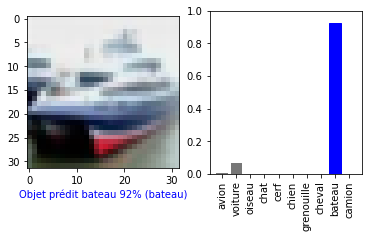

In [21]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_prediction_image(y_proba[i], y_test[i], X_test[i])
plt.subplot(1,2,2)
plot_prediction_bar_chart(y_proba[i], y_test[i], X_test[i])
plt.show()

## Affichons les 15 premières images et visualisons les prédictions 

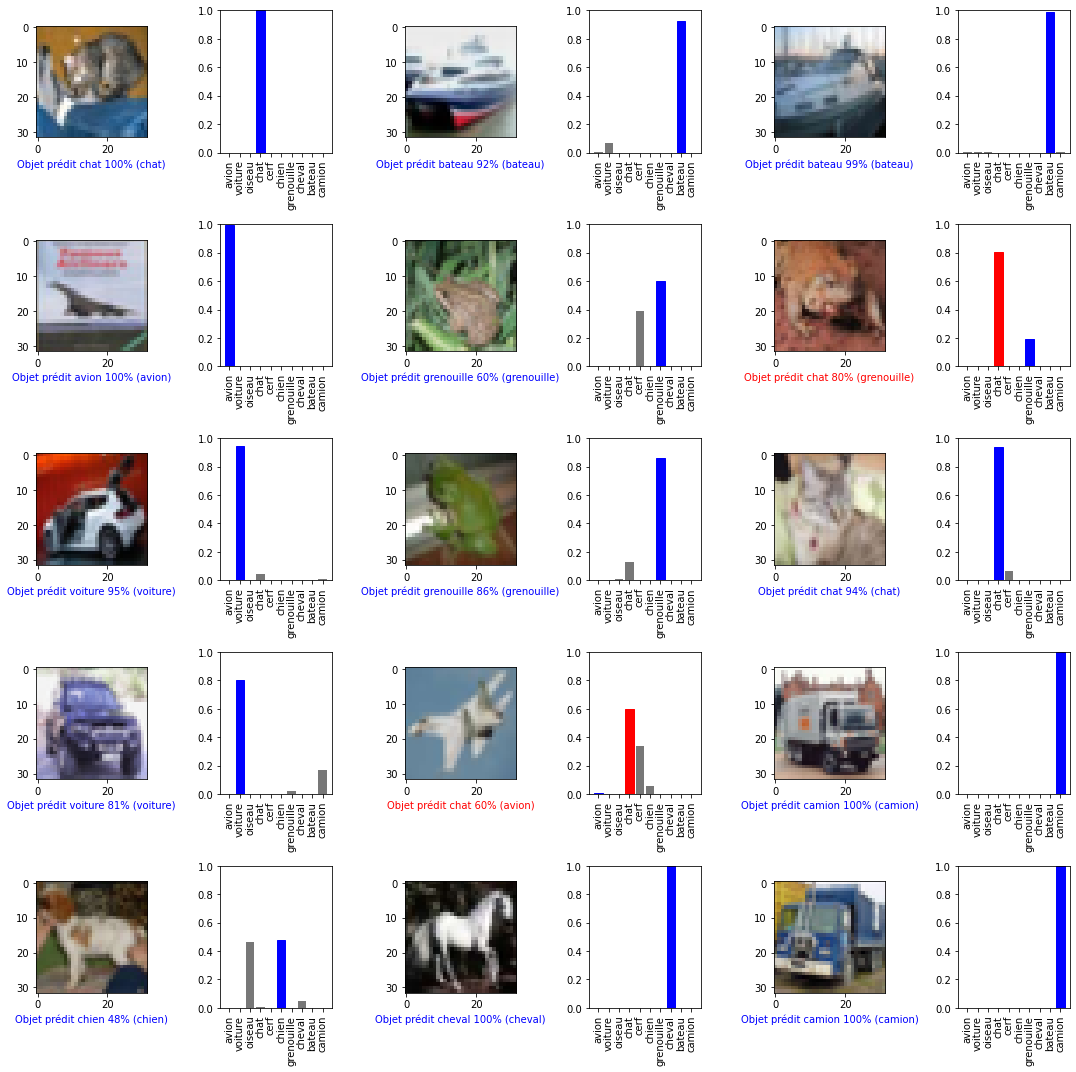

In [22]:
num_rows = 5
num_cols = 3
plt.figure(figsize=(5*num_cols, 3*num_rows))
for row in range(num_rows):
    for col in range(num_cols):
        index = num_cols * row + col
        plt.subplot(num_rows, 2*num_cols, 2*index+1)
        plot_prediction_image(y_proba[index], y_test[index], X_test[index])
        plt.subplot(num_rows, 2*num_cols, 2*index+2)
        plot_prediction_bar_chart(y_proba[index], y_test[index], X_test[index])
plt.tight_layout()
plt.show()

